In [5]:
import cv2
from matplotlib import pyplot as plt

In [6]:
import numpy as np

In [8]:
import torch
import torchvision

In [11]:
import kornia as K

In [10]:
!pip install kornia

                                              0.0/705.7 kB ? eta -:--:--
     ------------------------------------- 705.7/705.7 kB 15.1 MB/s eta 0:00:00


In [12]:
img_bgr:np.ndarray = cv2.imread('../Edge Detection/doraemon.png',cv2.IMREAD_COLOR)

In [13]:
x_bgr:torch.Tensor = K.utils.image_to_tensor(img_bgr)
x_bgr = x_bgr[None,...].float()/255

In [14]:
x_rgb:torch.tensor = K.color.bgr_to_rgb(x_bgr)

In [15]:
x_gray = K.color.rgb_to_grayscale(x_rgb)

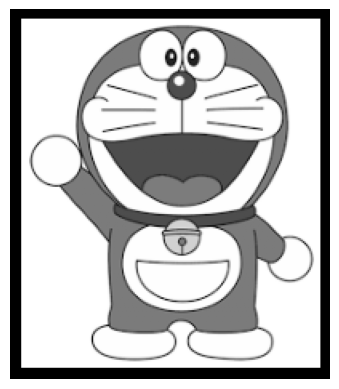

In [16]:
def imshow(input:torch.tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np :np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()
    
imshow(x_gray)

# 1st order Derivates

In [17]:
grads:torch.tensor = K.filters.spatial_gradient(x_gray,order=1)

In [18]:
grads_x = grads[:,:,0]

In [19]:
grads_y = grads[:,:,1]

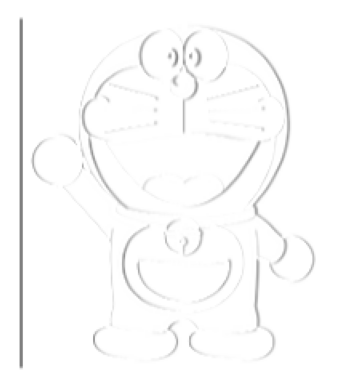

In [22]:
imshow(1 - grads_x.clamp(0,1))

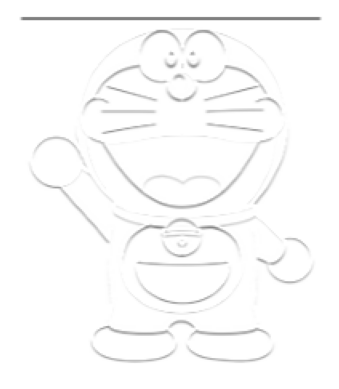

In [24]:
imshow(1-grads_y.clamp(0,1))

# 2nd Order Derivatives 

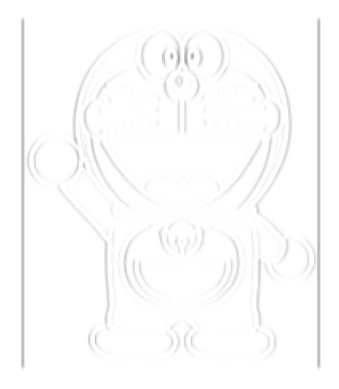

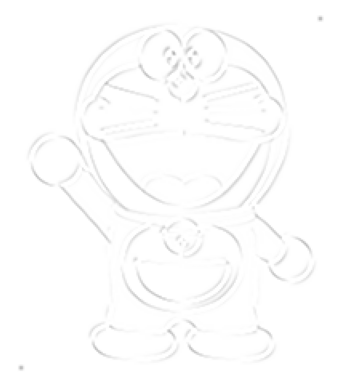

In [31]:
grads:torch.tensor = K.filters.spatial_gradient(x_gray,order = 2)
grads_x = grads[:,:,0]
grads_y = grads[:,:,1]

imshow(1-grads_x.clamp(0,1))
imshow(1-grads_y.clamp(0,1))


# Sobel Edges

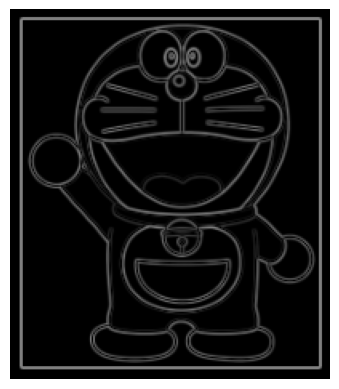

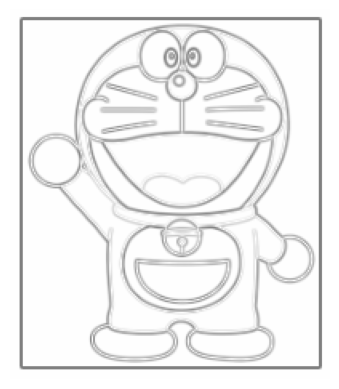

In [37]:
sobel : torch.tensor = K.filters.sobel(x_gray)
imshow(sobel.clamp(0,1))

imshow(1-sobel)

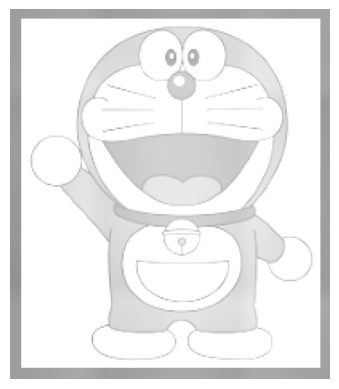

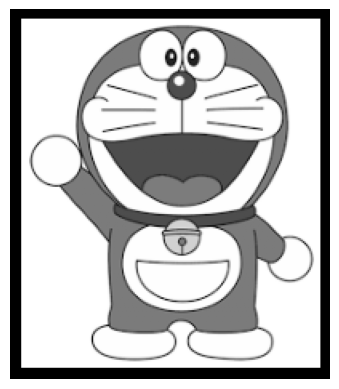

In [49]:
img_laplacian :torch.tensor = K.filters.laplacian(x_gray,kernel_size=105)
    
imshow(1-img_laplacian.clamp(0,1))
imshow(x_gray)

# Canny Edges Detector

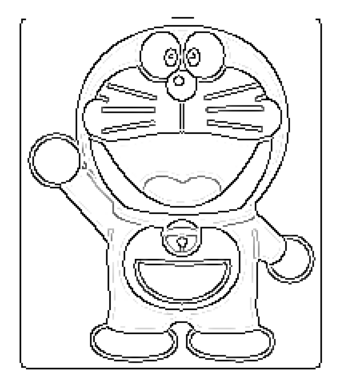

In [56]:
img_canny : torch.tensor = K.filters.canny(x_gray)[0]

imshow(1-img_canny.clamp(0.,1.))